# Linear Regression using TensorFlow

# Read the data first

In [2]:
# !pip install tensorflow-probability
# !pip install tensorflow

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 15

data = pd.read_csv("Dataset/LinearRegression/Units_Sold_ProfitPct.csv")
data

,UnitSold_in_1000,Profits_Pct
0,0.54,3.69
1,0.72,4.58
2,0.60,4.03
3,0.54,3.67
4,0.42,3.40
5,0.64,4.03
6,0.43,3.76
7,0.89,4.61
8,0.96,4.98
9,0.38,2.89


# Convert the data into Tensfor for using with Tensorflow

In [6]:

# Convert to TensorFlow tensors
x = tf.constant(data['UnitSold_in_1000'].to_numpy(), dtype=tf.float32)
y = tf.constant(data['Profits_Pct'].to_numpy(), dtype=tf.float32)


2024-02-12 14:43:05.437387: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


# Define the Model

In [7]:
# Initialize weights
w_0 = tf.Variable(0.0)
w_1 = tf.Variable(0.0)

# Define the Linear Regression model
def model(X):
    return w_1 * X + w_0

# Define the Cost Function/Loss Function

In [8]:

# Define the loss function (mean squared error)
def loss_fn(Y_hat, Y):
    # tf.reduce_mean calculates the mean of the argument vector
    return tf.reduce_mean(tf.square(Y_hat - Y))

# Set the Optimizer

In [9]:
# Define the optimizer
## Here we will use Stochastic Gradient Descent with Learning Rate of 0.1
optimizer = tf.optimizers.SGD(learning_rate=0.1)

# Store the values of loss, w_0, and w_1 for plotting
loss_values = []
w_0_values = []
w_1_values = []

# Training Loop

In [10]:

# Training loop
for i in range(1000):
    with tf.GradientTape() as tape:
        y_hat = model(x)
        loss = loss_fn(y_hat, y)
    gradients = tape.gradient(loss, [w_0, w_1])
    optimizer.apply_gradients(zip(gradients, [w_0, w_1]))
    loss_values.append(loss.numpy())
    w_0_values.append(w_0.numpy())
    w_1_values.append(w_1.numpy())

# Check Your Results

w_0: 2.131746530532837, w_1: 2.994084596633911


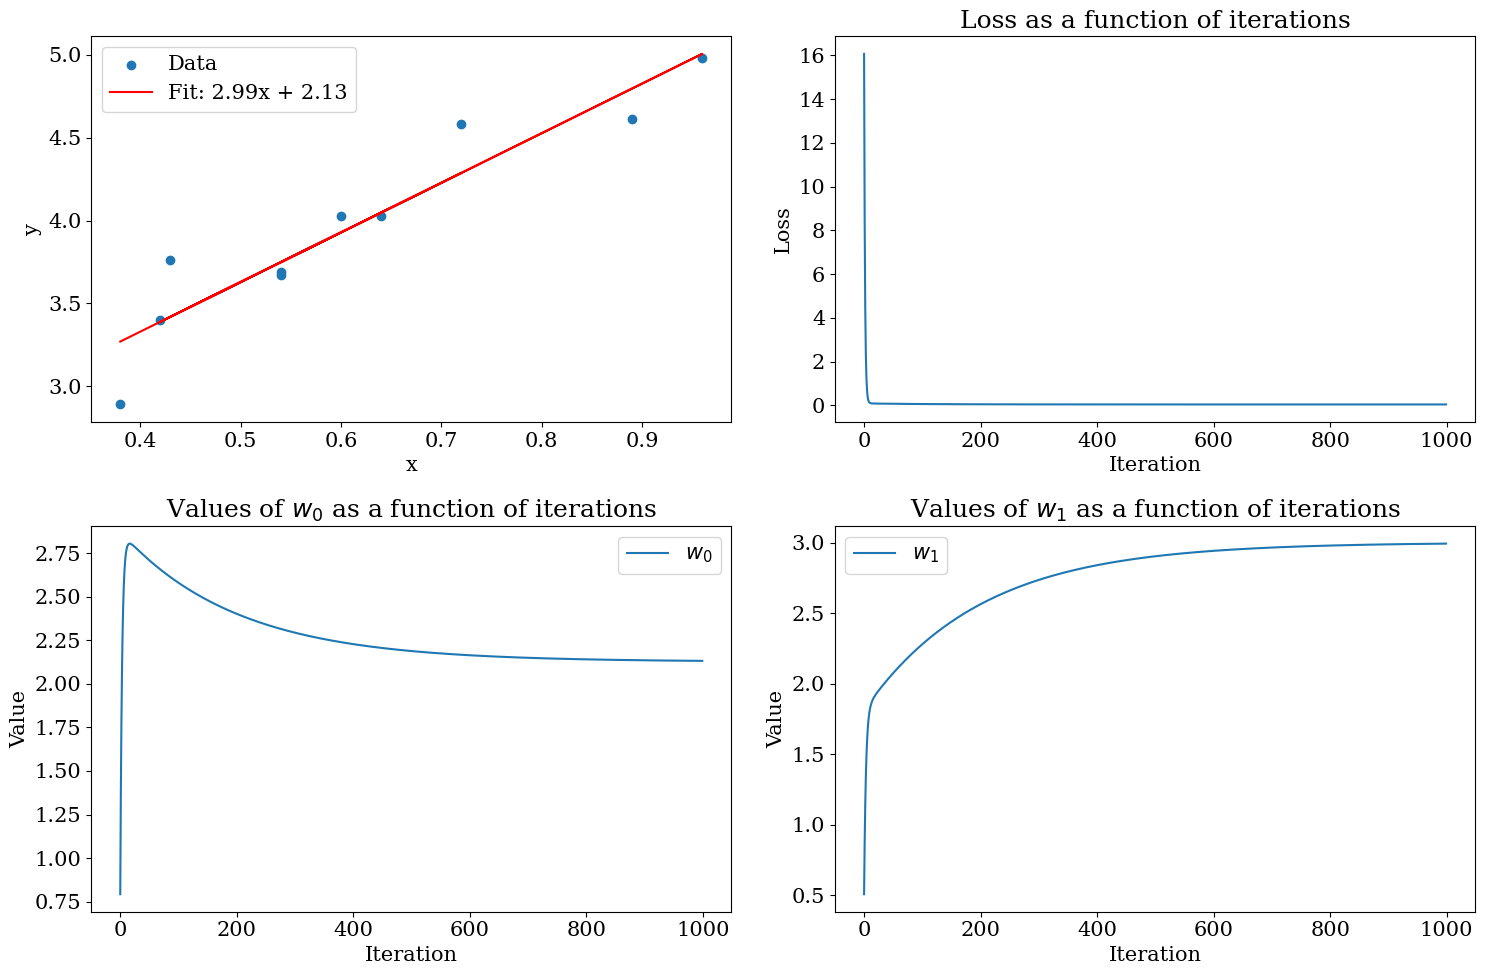

In [11]:


# Print the learned parameters
print(f"w_0: {w_0.numpy()}, w_1: {w_1.numpy()}")

# Plot the data and the learned line
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(x, y, label='Data')
plt.plot(x, model(x), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot the loss as a function of iterations
plt.subplot(2, 2, 2)
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss as a function of iterations')

# Plot the values of w_0 and w_1 as a function of iterations
plt.subplot(2, 2, 3)
plt.plot(w_0_values, label='$w_0$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_0$ as a function of iterations')
plt.legend()


plt.subplot(2, 2, 4)
plt.plot(w_1_values, label='$w_1$')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Values of $w_1$ as a function of iterations')
plt.legend()

plt.tight_layout()
plt.show()

# Make Inferences on Data

In [12]:
new_data_points = tf.constant([0.47, 0.91, 0.23])
predictions = model(new_data_points).numpy()
for x_new, pred in zip(new_data_points, predictions):
    print(f"The predicted value for x={x_new} is {pred}")


The predicted value for x=0.4699999988079071 is 3.538966178894043
The predicted value for x=0.9100000262260437 is 4.856363296508789
The predicted value for x=0.23000000417232513 is 2.8203859329223633


## Calculating Confidence Interval

In [13]:
y_hat = model(x)
SSE = tf.reduce_sum(tf.square(y - y_hat))
MSE = SSE/(len(data)-2)
SSTO = tf.reduce_sum(tf.square(y -  tf.reduce_mean(y)))
R_squared = 1 - (SSE/SSTO)
R_squared

<tf.Tensor: shape=(), dtype=float32, numpy=0.8856689>

In [15]:
variance_w1 = MSE/tf.reduce_sum(tf.square(x -  tf.reduce_mean(x)))
variance_w1

<tf.Tensor: shape=(), dtype=float32, numpy=0.14543295>

In [16]:
variance_w0 =  MSE*(1/len(data) + (tf.reduce_mean(x)*tf.reduce_mean(x))/(tf.reduce_sum(tf.square(x -  tf.reduce_mean(x)))))
variance_w0

<tf.Tensor: shape=(), dtype=float32, numpy=0.059490807>

In [17]:
import tensorflow_probability as tfp

# Degrees of freedom
df = 8
# Quantile
p = 0.975
# Create a Student's t-distribution
dist = tfp.distributions.StudentT(df=df, loc=0., scale=1.)

# Calculate the t-statistic
t_statistic = dist.quantile(p)

w1_upper = w_1 + t_statistic*variance_w1
w1_lower = w_1 - t_statistic*variance_w1
[w1_upper, w1_lower]

[<tf.Tensor: shape=(), dtype=float32, numpy=3.3294537>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.6587155>]

In [18]:
w0_upper = w_0 + t_statistic*variance_w0
w0_lower = w_0 - t_statistic*variance_w0
[w0_upper, w1_lower]

[<tf.Tensor: shape=(), dtype=float32, numpy=2.2689326>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.6587155>]

In [19]:
# variance on predicted y
variance_y = MSE*(1/len(data) + (tf.square(x -  tf.reduce_mean(x)  )/(tf.reduce_sum(tf.square(x -  tf.reduce_mean(x))))))
variance_y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.00577369, 0.00671609, 0.00504071, 0.00577369, 0.010381  ,
       0.00513378, 0.00983708, 0.0162594 , 0.02263227, 0.01284755],
      dtype=float32)>

In [20]:
from scipy.stats import f

# Degrees of freedom
df1 = 2
df2 = len(data) - 2  # replace n with your sample size

# Quantile
p = 1 - 0.05  # replace alpha with your significance level

# Calculate the F-statistic
f_statistic = f.ppf(p, df1, df2)


y_upper = y_hat + f_statistic*variance_y
y_upper

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3.774297 , 4.3174343, 3.9506738, 3.774297 , 3.4355507, 4.0708523,
       3.463066 , 4.8689823, 5.1069846, 3.3267856], dtype=float32)>

In [21]:
y_lower = y_hat - f_statistic*variance_y
y_lower

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([3.7228076, 4.2575407, 3.905721 , 3.7228076, 3.3429737, 4.025069 ,
       3.3753395, 4.723982 , 4.905151 , 3.212212 ], dtype=float32)>

Text(0.5, 1.0, 'WHS Band')

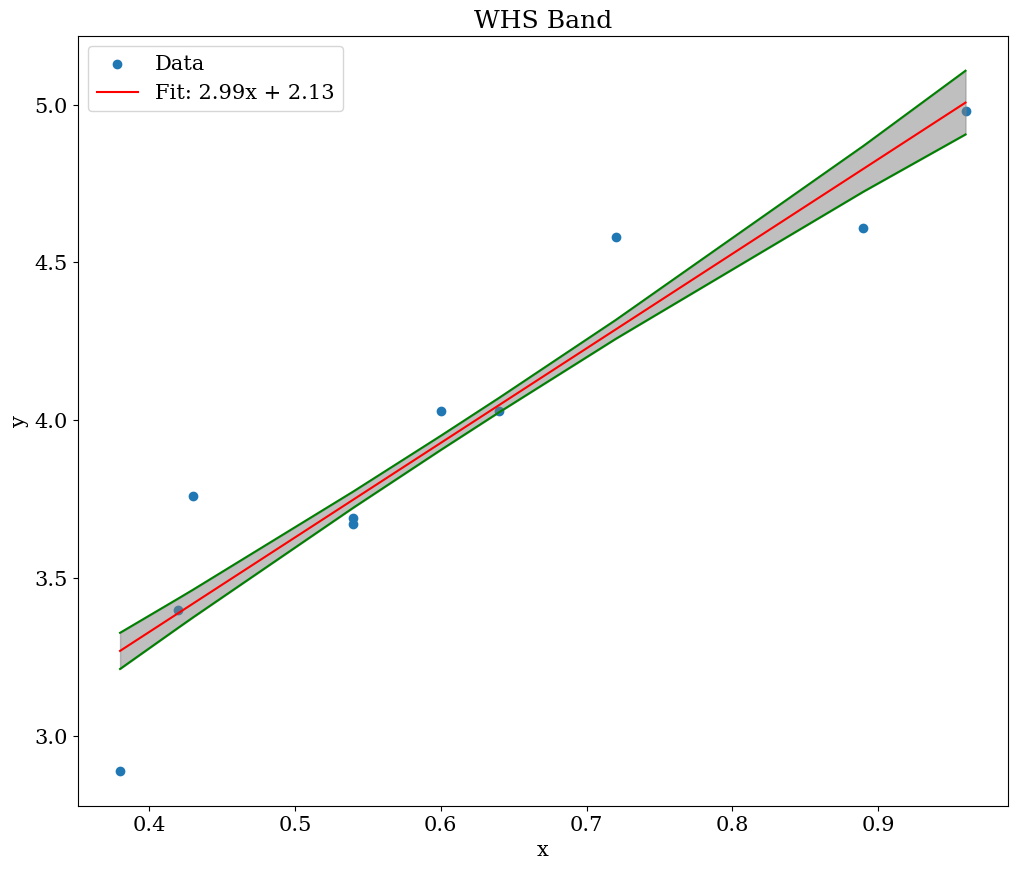

In [22]:
# Plot the data and the learned line
# Sort x, y_lower, and y_upper using the sorted indices
x = np.array(x)
y_lower = np.array(y_lower)
y_upper = np.array(y_upper)

# Get the sorted indices of x
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_lower_sorted = y_lower[sorted_indices]
y_upper_sorted = y_upper[sorted_indices]

plt.figure(figsize=(12,10))
plt.scatter(x, y, label='Data')
plt.plot(x_sorted, model(x_sorted), color='red', label='Fit: {0:.2f}x + {1:.2f}'.format(w_1.numpy(), w_0.numpy()))
plt.plot(x_sorted, y_lower_sorted, color='green')
plt.plot(x_sorted, y_upper_sorted, color='green')
plt.fill_between(x_sorted, y_lower_sorted, y_upper_sorted, color='gray', alpha=0.5)  
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('WHS Band')